In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Note: if you clone the gcr-catalogs repo and are running this under the `examples` folder,
## you can also use your version of GCRCatalogs:
#import sys
#sys.path.insert(0, '/path/to/your/cloned/gcr-catalogs')

## The following lines are to check if you're in the lsst group
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

import numpy as np
import pandas as pd
import pickle 
import GCRCatalogs
from GCR import GCRQuery

## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 1.3.2 | GCR = 0.9.2


 LSST has both raw input catalogs, and "measured" catalogs from ?images? I think for the second part we must learn more about how the image style output is produced
 
for the following I'll consider the sim catalog style data product

# RedMaPPer catalog

This is v0.7.5, according to the wiki there is also a v0.8.5? I think this fine for first data access tests but will need to update to latest

In [2]:
redcat = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_redmapper_v0.7.5')

In [3]:
sorted(redcat.list_all_quantities())

['cluster_id',
 'cluster_id_member',
 'dec',
 'dec_cen_0',
 'dec_cen_1',
 'dec_cen_2',
 'dec_cen_3',
 'dec_cen_4',
 'dec_member',
 'id_cen_0',
 'id_cen_1',
 'id_cen_2',
 'id_cen_3',
 'id_cen_4',
 'id_member',
 'mag_g_lsst_member',
 'mag_i_lsst_member',
 'mag_r_lsst_member',
 'mag_y_lsst_member',
 'mag_z_lsst_member',
 'magerr_g_lsst_member',
 'magerr_i_lsst_member',
 'magerr_r_lsst_member',
 'magerr_y_lsst_member',
 'magerr_z_lsst_member',
 'maskfrac',
 'p_cen_0',
 'p_cen_1',
 'p_cen_2',
 'p_cen_3',
 'p_cen_4',
 'p_member',
 'pfree_member',
 'ra',
 'ra_cen_0',
 'ra_cen_1',
 'ra_cen_2',
 'ra_cen_3',
 'ra_cen_4',
 'ra_member',
 'redshift',
 'redshift_err',
 'redshift_true_cg',
 'redshift_true_member',
 'refmag_err_member',
 'refmag_member',
 'richness',
 'richness_err',
 'scaleval',
 'theta_i_member',
 'theta_r_member']

In [44]:
clust = redcat.get_quantities(['cluster_id', 'ra', 'dec', "richness", "redshift"])

Text(0, 0.5, '#')

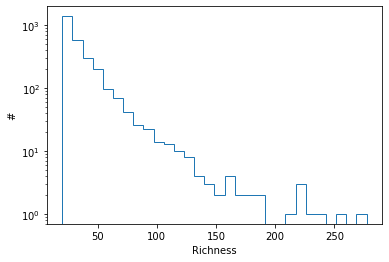

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(clust["richness"], bins=30, histtype="step", log=True)

ax.set_xlabel("Richness")
ax.set_ylabel("#")

For now select clusters in a Y1 /y3 like narrow bin to test data access

In [6]:
ii = (clust["richness"] > 45) & (clust["richness"] < 60) & (clust["redshift"] > 0.2) & (clust["redshift"] < 0.35)
ii.sum()

34

In [260]:
ii = (clust["richness"] > 30) & (clust["richness"] < 60) & (clust["redshift"] > 0.2) & (clust["redshift"] < 0.35)
ii.sum()

110

# Use DC2_small for testing

In [7]:
dc2_small = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')


In [8]:
dc_pos = dc2_small.get_quantities(["ra", "dec"])

Text(0, 0.5, 'DEC')

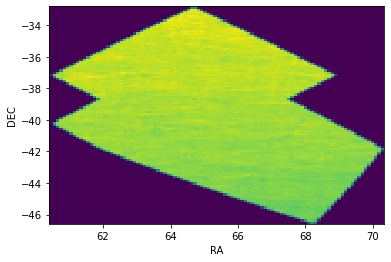

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist2d(dc_pos["ra"], dc_pos["dec"], bins=100)

ax.set_xlabel("RA")
ax.set_ylabel("DEC")

In [42]:
clust

{'ra': array([52.52043643, 56.92037653, 56.99849698, ..., 71.69041294,
        69.50021102, 69.32741928]),
 'dec': array([-25.71799612, -27.20434071, -26.71720819, ..., -44.93665779,
        -43.67378278, -43.62310755]),
 'richness': array([177.87721 , 160.45604 , 124.33225 , ...,  23.14601 ,  51.108376,
         22.856165], dtype=float32),
 'redshift': array([0.5143181, 0.5737418, 1.051721 , ..., 1.118051 , 1.1414601,
        1.1315061], dtype=float32)}

Text(0, 0.5, 'DEC')

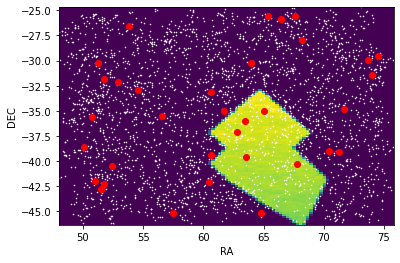

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

bins = (
    np.linspace(clust["ra"].min(), clust["ra"].max(), 100),
    np.linspace(clust["dec"].min(), clust["dec"].max(), 100),
)
ax.hist2d(dc_pos["ra"], dc_pos["dec"], bins=bins)
ax.scatter(clust["ra"], clust["dec"], color="white", s=0.3)
ax.scatter(clust["ra"][ii], clust["dec"][ii], color="red")

ax.set_xlabel("RA")
ax.set_ylabel("DEC")

27
132
136
139
163
311
314
319
595
608
625
915
937
957
1207
1220
1248
1505
1514
1543
1549
1882
1894
1911
1918
1927
2152
2166
2181
2184
2191
2502
2503
2680


Text(0, 0.5, 'DEC')

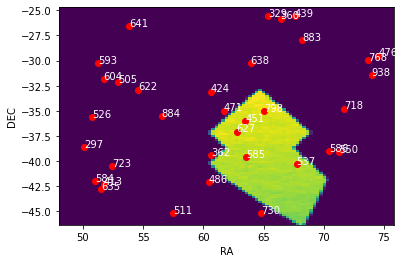

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

bins = (
    np.linspace(clust["ra"].min(), clust["ra"].max(), 100),
    np.linspace(clust["dec"].min(), clust["dec"].max(), 100),
)
ax.hist2d(dc_pos["ra"], dc_pos["dec"], bins=bins)
#ax.scatter(clust["ra"], clust["dec"], color="white", s=0.3)
ax.scatter(clust["ra"][ii], clust["dec"][ii], color="red")

for i in np.nonzero(ii)[0]:
    print(i)
    ax.text(clust["ra"][i], clust["dec"][i], str(clust["cluster_id"][i]), color="white")


ax.set_xlabel("RA")
ax.set_ylabel("DEC")

In [55]:
clust_id_list = np.sort([798, 451, 627, 585, 537])

In [60]:
clust_inds = []
for iid in clust_id_list:
    val = np.where(clust["cluster_id"] == iid)[0][0]
    clust_inds.append(val)
clust_inds = np.array(clust_inds)

In [56]:
clust_id_list

array([451, 537, 585, 627, 798])

# Notebook focus

* Query the vicinity of each ~5 clusters  -- DONE
    * measure number profile
    * measure mag-i true in vicinity, as function of R
    * measure g-r, r-i, i-z true in vicinity as function of R
* Measure background from all objects
    * assume flat number profile
    * background for mag-i
    * background for g-r, r-i, i-z
* piece-wise background subtraction
* calculate CLF from LOS truth catalog

## Selecting clusters in DC2 small

1505
1514
2181
2184
1549


Text(0, 0.5, 'DEC')

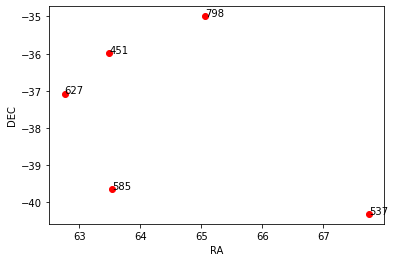

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

bins = (
    np.linspace(clust["ra"].min(), clust["ra"].max(), 100),
    np.linspace(clust["dec"].min(), clust["dec"].max(), 100),
)
#ax.hist2d(dc_pos["ra"], dc_pos["dec"], bins=bins)
#ax.scatter(clust["ra"], clust["dec"], color="white", s=0.3)
ax.scatter(clust["ra"][clust_inds], clust["dec"][clust_inds], color="red")


for i in clust_inds:
    print(i)
    ax.text(clust["ra"][i], clust["dec"][i], str(clust["cluster_id"][i]), color="black")


ax.set_xlabel("RA")
ax.set_ylabel("DEC")

## Query the Vicinity of each cluster

In [85]:
import pickle

In [142]:
query_pad = 20 / 60. # arcmin to deg
quantities = ["ra", "dec", "redshift",
              "mag_g", "mag_r", "mag_i",
              "Mag_true_g_lsst_z0", "Mag_true_r_lsst_z0", "Mag_true_i_lsst_z0"]

In [143]:
galcats = []
for i, cid in enumerate(clust_inds):
    print(i, cid)
    ra = clust["ra"][cid]
    dec = clust["dec"][cid]
    filters = [
        "ra < {}".format(ra + query_pad),
        "ra > {}".format(ra - query_pad),
        "dec < {}".format(dec + query_pad),
        "dec > {}".format(dec - query_pad),
    ]
    print(filters)
    dd = dc2_small.get_quantities(quantities, 
                           filters=filters)
    galcats.append(dd)

0 1505
['ra < 63.828500728024906', 'ra > 63.161834061358235', 'dec < -35.66183421225681', 'dec > -36.32850087892348']
1 1514
['ra < 68.08098907434645', 'ra > 67.41432240767979', 'dec < -39.977129762793766', 'dec > -40.64379642946044']
2 2181
['ra < 63.875709379617085', 'ra > 63.20904271295041', 'dec < -39.310002411385845', 'dec > -39.97666907805252']
3 2184
['ra < 63.09170408712101', 'ra > 62.42503742045434', 'dec < -36.74046757614883', 'dec > -37.4071342428155']
4 1549
['ra < 65.39020905035561', 'ra > 64.72354238368895', 'dec < -34.66002923046487', 'dec > -35.32669589713154']


In [144]:
galtabs = []
for i, cat in enumerate(galcats):
    print(i)
    cra = clust["ra"][clust_inds[i]]
    cdec = clust["dec"][clust_inds[i]]

    dist = np.sqrt((cra - cat["ra"])**2. + (cdec - cat["dec"])**2.)
    tab = pd.DataFrame(cat)
    tab["R"] = dist * 60.
    galtabs.append(tab)
pickle.dump(galtabs, open("/global/cscratch1/sd/tvarga/DC_DATA/dc2_small_rm-galcat.p", "wb"))

0
1
2
3
4


In [145]:
alltab = pd.concat(galtabs)

In [146]:
redges = np.linspace(0.01, 20, 10)
rareas = np.array([np.pi * (redges[i + 1] ** 2. - redges[i] ** 2.)
                  for i, val in enumerate(redges[:-1])])
rcens = redges[:-1] + np.diff(redges) / 2.

In [147]:
ii = alltab["mag_i"] < 22.5

In [159]:
ii.sum()

0

In [163]:
rbins

array([ 0.01      ,  0.05623413,  0.31622777,  1.77827941, 10.        ])

In [165]:
10**1.3

19.952623149688797

In [176]:
icens

array([-23.55555556, -22.66666667, -21.77777778, -20.88888889,
       -20.        , -19.11111111, -18.22222222, -17.33333333,
       -16.44444444])

(19870,)
(43788,)
(96053,)


Text(0, 0.5, 'p.d.f.')

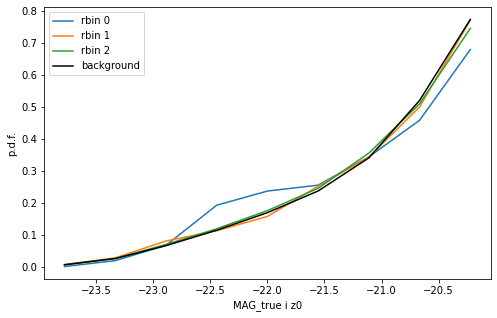

In [195]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(-24, -20, 10)
icens = ibins[:-1] + np.diff(ibins) / 2.

ii = (alltab["R"] > 18.)
bckgr = np.histogram(alltab["Mag_true_i_lsst_z0"][ii], bins=ibins, density=True)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1])
    print(alltab["Mag_true_i_lsst_z0"][ii].shape)

    vals = np.histogram(alltab["Mag_true_i_lsst_z0"][ii], bins=ibins, density=True)[0]
    
    ax.plot(icens, vals, label="rbin "+str(i))
    
ax.plot(icens, bckgr, label="background", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
#ax.set_yscale("log")
ax.set_xlabel("MAG_true i z0")
ax.set_ylabel("p.d.f.")

(143,)
(282,)
(583,)


Text(0, 0.5, 'p.d.f.')

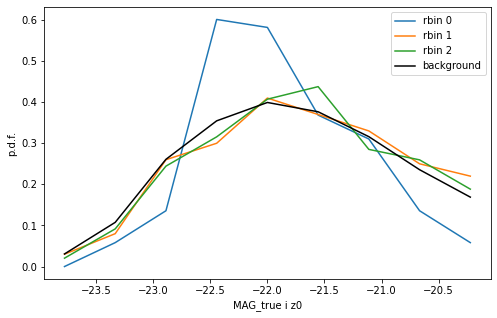

In [196]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(-24, -20, 10)
icens = ibins[:-1] + np.diff(ibins) / 2.

magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > 18.) & magcut
bckgr = np.histogram(alltab["Mag_true_i_lsst_z0"][ii], bins=ibins, density=True)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
    print(alltab["Mag_true_i_lsst_z0"][ii].shape)

    vals = np.histogram(alltab["Mag_true_i_lsst_z0"][ii], bins=ibins, density=True)[0]
    
    ax.plot(icens, vals, label="rbin "+str(i))
    
ax.plot(icens, bckgr, label="background", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
#ax.set_yscale("log")
ax.set_xlabel("MAG_true i z0")
ax.set_ylabel("p.d.f.")

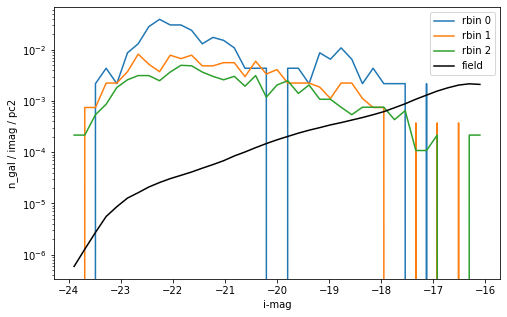

In [257]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(-24, -16., 40)
icens = ibins[:-1] + np.diff(ibins) / 2.

#magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > 18.) #& magcut
gr = alltab["Mag_true_i_lsst_z0"][ii]
bckgr = np.histogram(gr, bins=ibins, density=True)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
#    print(alltab["Mag_true_i_lsst_z0"][ii].shape)
    gr = alltab["Mag_true_i_lsst_z0"][ii] 
    
    vals = np.histogram(gr, bins=ibins, density=True)[0]  / rareas[i]
    
    ax.plot(icens, vals, label="rbin "+str(i))
    
ax.plot(icens, bckgr /  rareas[-1], label="field", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("i-mag")
ax.set_ylabel("n_gal / i-mag / pc2")
ax.axhline(0, ls="--", color="gray")

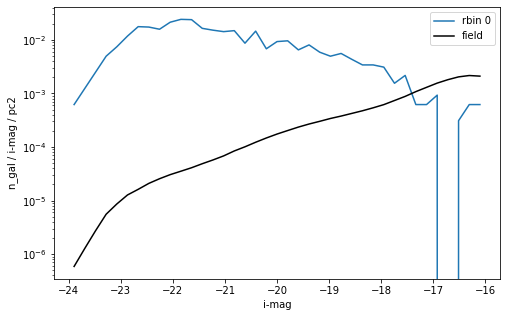

In [259]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(-24, -16., 40)
icens = ibins[:-1] + np.diff(ibins) / 2.

#magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > 18.) #& magcut
gr = alltab["Mag_true_i_lsst_z0"][ii]
bckgr = np.histogram(gr, bins=ibins, density=True)[0]

rbins = np.logspace(-0.01, 0.5, 2)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
#    print(alltab["Mag_true_i_lsst_z0"][ii].shape)
    gr = alltab["Mag_true_i_lsst_z0"][ii] 
    
    vals = np.histogram(gr, bins=ibins, density=True)[0]  / rareas[i]
    
    ax.plot(icens, vals, label="rbin "+str(i))
    
ax.plot(icens, bckgr /  rareas[-1], label="field", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("i-mag")
ax.set_ylabel("n_gal / i-mag / pc2")
ax.axhline(0, ls="--", color="gray")

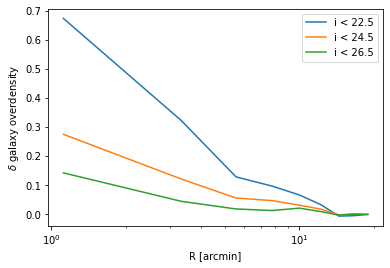

In [239]:
fig = plt.figure()
ax = fig.add_subplot(111)
for mlim in [22.5, 24.5, 26.5]:
    magcut = (alltab["mag_i"] < mlim)
    vals = np.histogram(alltab["R"][magcut], bins=redges)[0]
    ax.plot(rcens, vals / rareas / (vals[-1] / rareas[-1]) - 1, label="i < " + str(mlim))
ax.set_xscale("log")
ax.set_xscale("log")
ax.set_xlabel("R [arcmin]")
ax.set_ylabel("$\delta$ galaxy overdensity")
ax.legend()

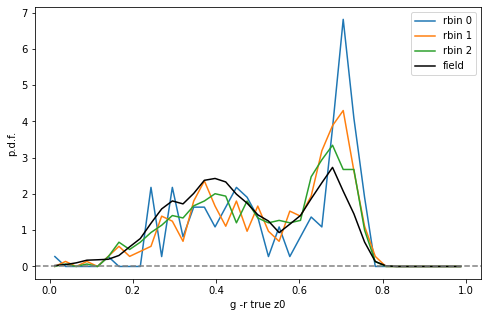

In [210]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(0, 1., 40)
icens = ibins[:-1] + np.diff(ibins) / 2.

magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > 18.) & magcut
gr = alltab["Mag_true_g_lsst_z0"][ii]  - alltab["Mag_true_r_lsst_z0"][ii]
bckgr = np.histogram(gr, bins=ibins, density=True)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
#    print(alltab["Mag_true_i_lsst_z0"][ii].shape)
    gr = alltab["Mag_true_g_lsst_z0"][ii]  - alltab["Mag_true_r_lsst_z0"][ii]
    
    vals = np.histogram(gr, bins=ibins, density=True)[0]
    
    ax.plot(icens, vals, label="rbin "+str(i))
    
ax.plot(icens, bckgr, label="field", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
#ax.set_yscale("log")
ax.set_xlabel("g -r true z0")
ax.set_ylabel("p.d.f.")
ax.axhline(0, ls="--", color="gray")

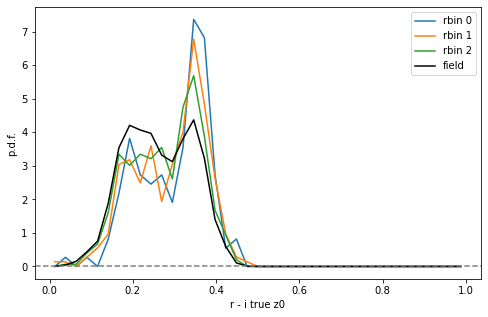

In [212]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(0, 1., 40)
icens = ibins[:-1] + np.diff(ibins) / 2.

magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > 20.) & magcut
gr = alltab["Mag_true_r_lsst_z0"][ii]  - alltab["Mag_true_i_lsst_z0"][ii]
bckgr = np.histogram(gr, bins=ibins, density=True)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
#    print(alltab["Mag_true_i_lsst_z0"][ii].shape)
    gr = alltab["Mag_true_r_lsst_z0"][ii]  - alltab["Mag_true_i_lsst_z0"][ii]
    
    vals = np.histogram(gr, bins=ibins, density=True)[0]
    
    ax.plot(icens, vals, label="rbin "+str(i))
    
ax.plot(icens, bckgr, label="field", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
#ax.set_yscale("log")
ax.set_xlabel("r - i true z0")
ax.set_ylabel("p.d.f.")
ax.axhline(0, ls="--", color="gray")

# Background subtraction shown in true colors

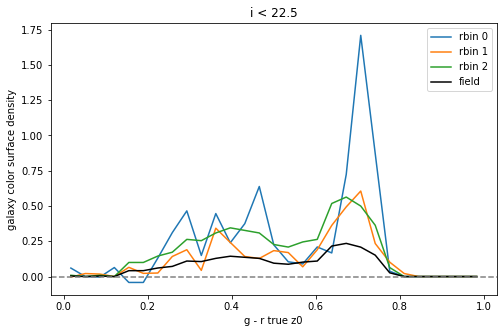

In [250]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(0, 1., 30)
icens = ibins[:-1] + np.diff(ibins) / 2.

magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > rbins[-2]) & (alltab["R"] < rbins[-1]) & magcut
gr = alltab["Mag_true_g_lsst_z0"][ii]  - alltab["Mag_true_r_lsst_z0"][ii]
bckgr = np.histogram(gr, bins=ibins)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
#    print(alltab["Mag_true_i_lsst_z0"][ii].shape)
    gr = alltab["Mag_true_g_lsst_z0"][ii]  - alltab["Mag_true_r_lsst_z0"][ii]
    
    vals = np.histogram(gr, bins=ibins)[0] / rareas[i]
    
    ax.plot(icens, vals - bckgr / rareas[-1], label="rbin "+str(i))
    
ax.plot(icens, bckgr / rareas[-1],  label="field", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
ax.set_title("i < 22.5")
#ax.set_yscale("log")
ax.set_xlabel("g - r true z0")
ax.set_ylabel("galaxy color surface density")
ax.axhline(0, ls="--", color="gray")

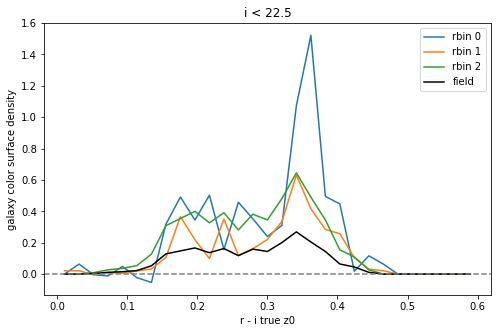

In [251]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(0, 0.6, 30)
icens = ibins[:-1] + np.diff(ibins) / 2.

magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > rbins[-2]) & (alltab["R"] < rbins[-1]) & magcut
gr = alltab["Mag_true_r_lsst_z0"][ii]  - alltab["Mag_true_i_lsst_z0"][ii]
bckgr = np.histogram(gr, bins=ibins)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
#    print(alltab["Mag_true_i_lsst_z0"][ii].shape)
    gr = alltab["Mag_true_r_lsst_z0"][ii]  - alltab["Mag_true_i_lsst_z0"][ii]
    
    vals = np.histogram(gr, bins=ibins)[0] / rareas[i]
    
    ax.plot(icens, vals - bckgr / rareas[-1], label="rbin "+str(i))
    
ax.plot(icens, bckgr / rareas[-1],  label="field", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
ax.set_title("i < 22.5")
#ax.set_yscale("log")
ax.set_xlabel("r - i true z0")
ax.set_ylabel("galaxy color surface density")
ax.axhline(0, ls="--", color="gray")

# background subtraction in OBS colors

In [248]:
magcut = (alltab["mag_i"] < 24)
ii = (alltab["R"] > rbins[-2]) & (alltab["R"] < rbins[-1]) & magcut
ii.sum() / rareas[-1]

5.967045981202912

In [249]:
magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > rbins[-2]) & (alltab["R"] < rbins[-1]) & magcut
ii.sum() / rareas[-1]

2.2115624965297505

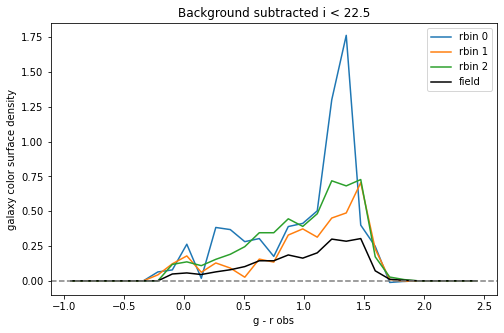

In [236]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(-1, 2.5, 30)
icens = ibins[:-1] + np.diff(ibins) / 2.

magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > rbins[-2]) & (alltab["R"] < rbins[-1]) & magcut
gr = alltab["mag_g"][ii]  - alltab["mag_r"][ii]
bckgr = np.histogram(gr, bins=ibins)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
#    print(alltab["Mag_true_i_lsst_z0"][ii].shape)
    gr = alltab["mag_g"][ii]  - alltab["mag_r"][ii]
    
    vals = np.histogram(gr, bins=ibins)[0] / rareas[i]
    
    ax.plot(icens, vals - bckgr / rareas[-1], label="rbin "+str(i))
    
ax.plot(icens, bckgr / rareas[-1],  label="field", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
ax.set_title("Background subtracted i < 22.5")
#ax.set_yscale("log")
ax.set_xlabel("g - r obs")
ax.set_ylabel("galaxy color surface density")
ax.axhline(0, ls="--", color="gray")

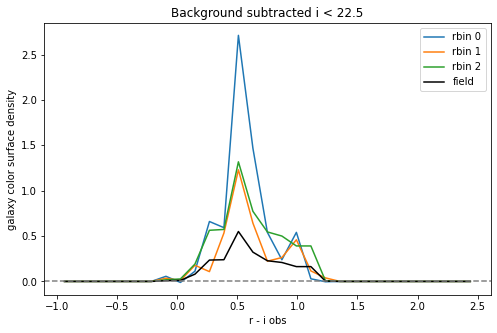

In [235]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
#ibins = np.ls

ibins = np.linspace(-1, 2.5, 30)
icens = ibins[:-1] + np.diff(ibins) / 2.

magcut = (alltab["mag_i"] < 22.5)
ii = (alltab["R"] > rbins[-2]) & (alltab["R"] < rbins[-1]) & magcut
gr = alltab["mag_r"][ii]  - alltab["mag_i"][ii]
bckgr = np.histogram(gr, bins=ibins)[0]

rbins = np.logspace(-0.01, 0.5, 4)
for i in np.arange(len(rbins) - 1):
    ii = (alltab["R"] > rbins[i]) & (alltab["R"] < rbins[i + 1]) & magcut
#    print(alltab["Mag_true_i_lsst_z0"][ii].shape)
    gr = alltab["mag_r"][ii]  - alltab["mag_i"][ii]
    
    vals = np.histogram(gr, bins=ibins)[0] / rareas[i]
    
    ax.plot(icens, vals - bckgr / rareas[-1], label="rbin "+str(i))
    
ax.plot(icens, bckgr / rareas[-1],  label="field", color="black")    
#ax.hist(alltab["Mag_true_i_lsst_z0"], bins=100, histtype="step", density=True, label="all", color="gray")
ax.legend()
ax.set_title("Background subtracted i < 22.5")
#ax.set_yscale("log")
ax.set_xlabel("r - i obs")
ax.set_ylabel("galaxy color surface density")
ax.axhline(0, ls="--", color="gray")

In [ ]:
allgals = np.hstack(galcats)

Text(0, 0.5, 'DEC')

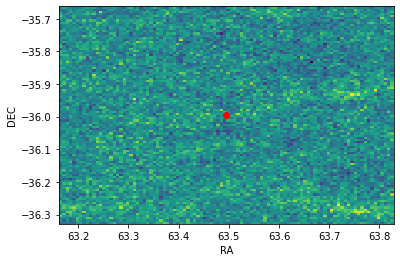

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist2d(dd["ra"], dd["dec"], bins=100)
ax.scatter(clust["ra"][clust_inds], clust["dec"][clust_inds], color="red")

ax.set_xlabel("RA")
ax.set_ylabel("DEC")

In [79]:
dd

{'mag_r': array([15.69287205, 21.39326668, 19.50081062, ..., 30.99432542,
        28.90418388, 31.0969225 ]),
 'ra': array([63.70097039, 63.20740502, 63.37683901, ..., 63.37821584,
        63.68112621, 63.23141267]),
 'mag_g': array([16.4317646 , 21.9596405 , 19.91305923, ..., 31.42061021,
        29.82578804, 32.26476346]),
 'dec': array([-36.18369957, -36.05138495, -35.97395701, ..., -35.87717338,
        -36.26017894, -36.17451305]),
 'mag_i': array([15.31111431, 21.10491943, 19.2827282 , ..., 30.97408655,
        28.73825981, 30.88243543])}

# Testing position based query from DC2

... there should really be a spherical ball point query for LSST implemented somehow? Or a pre-defined healpix id for objects

 we need to pre-filter based on:
 * position
 * magnitude

In [32]:
dd = dc2_small.get_quantities(quantities, 
                           filters=["ra < 64", "ra > 63"])

Text(0, 0.5, 'DEC')

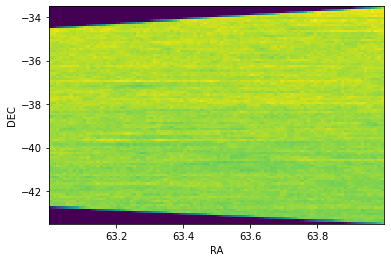

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist2d(dd["ra"], dd["dec"], bins=100)

ax.set_xlabel("RA")
ax.set_ylabel("DEC")